In [1]:
from io import StringIO

import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns



 # Raw Values

In [2]:
raw_volume = pd.read_csv(
    StringIO(
        """
X	2L
14.5	16.4
9.13	10.9
15.3	16.4
9.37	12.5
11.2	12.3
24	19.6
18.4	15.1
13.4	12.9
12.7	17.7
14.2	18.3
20.8	20.8
22.1	28
18.4	31.1
24.7	22.1
17.4	22.6
20.6	17.7
17.8	24.1
11.1	18.2
21.5	29.9
14.8	27.6
9.21	12
8.75	14.8
11.4	13.4
"""
    ),
    sep="\t",
).melt(var_name="chromosome", value_name="um3")

raw_sphere = pd.read_csv(
    StringIO(
        """
X	2L
0.659	0.641
0.665	0.713
0.647	0.598
0.673	0.653
0.679	0.605
0.516	0.532
0.642	0.688
0.61	0.603
0.691	0.679
0.661	0.616
0.53	0.549
0.414	0.425
0.608	0.441
0.451	0.391
0.491	0.512
0.422	0.439
0.529	0.478
0.434	0.565
0.544	0.449
0.537	0.48
0.664	0.453
0.575	0.482
0.569	0.477
"""
    ),
    sep="\t",
).melt(var_name="chromosome", value_name="Psi")


 ## Miriam's Plots
 Miriam's plots are not boxplots, but mean/std plots based on the
 un-normalized values. Rough recreation here.

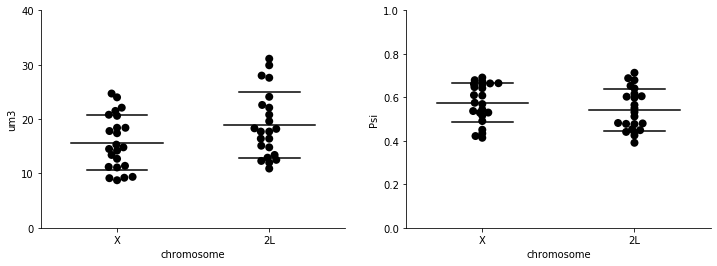

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1 / 3))

# Volume
raw_volume_stats = raw_volume.groupby("chromosome").agg(["mean", "std"]).droplevel(0, axis=1)

sns.swarmplot("chromosome", "um3", data=raw_volume, color="k", size=8, ax=ax1)
_mean = raw_volume_stats.loc["X", "mean"]
_std = raw_volume_stats.loc["X", "std"]
ax1.plot([-0.2, 0.2], [_mean + _std, _mean + _std], color="k")
ax1.plot([-0.3, 0.3], [_mean, _mean], color="k")
ax1.plot([-0.2, 0.2], [_mean - _std, _mean - _std], color="k")

_mean = raw_volume_stats.loc["2L", "mean"]
_std = raw_volume_stats.loc["2L", "std"]
ax1.plot([0.8, 1.2], [_mean + _std, _mean + _std], color="k")
ax1.plot([0.7, 1.3], [_mean, _mean], color="k")
ax1.plot([0.8, 1.2], [_mean - _std, _mean - _std], color="k")

ax1.set(ylim=(0, 40), yticks=[0, 10, 20, 30, 40])
sns.despine(ax=ax1)

# Sphericity
raw_sphere_stats = raw_sphere.groupby("chromosome").agg(["mean", "std"]).droplevel(0, axis=1)

sns.swarmplot("chromosome", "Psi", data=raw_sphere, color="k", size=8, ax=ax2)
_mean = raw_sphere_stats.loc["X", "mean"]
_std = raw_sphere_stats.loc["X", "std"]
ax2.plot([-0.2, 0.2], [_mean + _std, _mean + _std], color="k")
ax2.plot([-0.3, 0.3], [_mean, _mean], color="k")
ax2.plot([-0.2, 0.2], [_mean - _std, _mean - _std], color="k")

_mean = raw_sphere_stats.loc["2L", "mean"]
_std = raw_sphere_stats.loc["2L", "std"]
ax2.plot([0.8, 1.2], [_mean + _std, _mean + _std], color="k")
ax2.plot([0.7, 1.3], [_mean, _mean], color="k")
ax2.plot([0.8, 1.2], [_mean - _std, _mean - _std], color="k")

ax2.set(ylim=(0, 1), yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
sns.despine(ax=ax2)


 ## Boxplot of same data

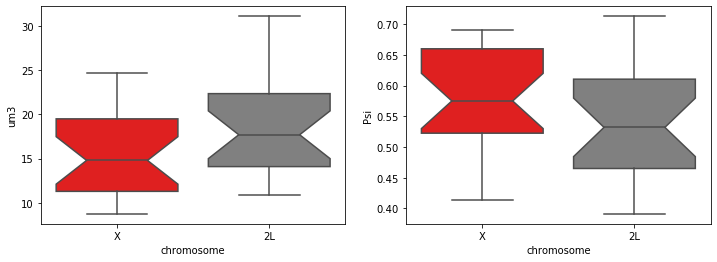

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1 / 3))
sns.boxplot("chromosome", "um3", data=raw_volume, palette=["r", "gray"], notch=True, ax=ax1)
sns.boxplot("chromosome", "Psi", data=raw_sphere, palette=["r", "gray"], notch=True, ax=ax2)


 # Volume normalized by probe size

In [5]:
probe_norm_volume = pd.read_csv(
    StringIO(
        """
X	2L
15.2943485981013	16.4
9.6301657034941	10.9
16.1381747276517	16.4
9.88331354235922	12.5
11.8135658137058	12.3
25.3147838865124	19.6
19.4080009796595	15.1
14.1340876699694	12.9
13.3957398066128	17.7
14.9779137995198	18.3
21.9394793683108	20.8
23.3106968288302	28
19.4080009796595	31.1
26.053131749869	22.1
18.3532183177215	22.6
21.7285228359232	17.7
18.7751313824967	24.1
11.708087547512	18.2
22.6778272316674	29.9
15.6107833966827	27.6
9.71454831644914	12
9.22934829195765	14.8
12.0245223460934	13.4
"""
    ),
    sep="\t",
).melt(var_name="chromosome", value_name="um3")


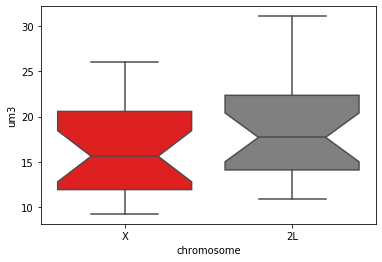

In [6]:
sns.boxplot("chromosome", "um3", data=probe_norm_volume, palette=["r", "gray"], notch=True)


 # Volume normalized by probe and chromosome number

In [7]:
probe_chrom_norm_volume = pd.read_csv(
    StringIO(
        """
X	2L
15.2943485981013	8.2
9.6301657034941	5.45
16.1381747276517	8.2
9.88331354235922	6.25
11.8135658137058	6.15
25.3147838865124	9.8
19.4080009796595	7.55
14.1340876699694	6.45
13.3957398066128	8.85
14.9779137995198	9.15
21.9394793683108	10.4
23.3106968288302	14
19.4080009796595	15.55
26.053131749869	11.05
18.3532183177215	11.3
21.7285228359232	8.85
18.7751313824967	12.05
11.708087547512	9.1
22.6778272316674	14.95
15.6107833966827	13.8
9.71454831644914	6
9.22934829195765	7.4
12.0245223460934	6.7
"""
    ),
    sep="\t",
).melt(var_name="chromosome", value_name="um3")


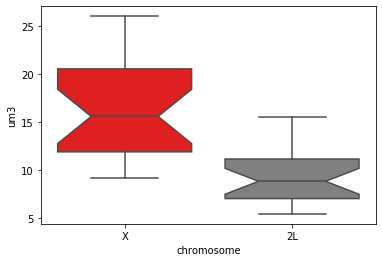

In [8]:
sns.boxplot("chromosome", "um3", data=probe_chrom_norm_volume, palette=["r", "gray"], notch=True)



In [9]:
# Stats

## Raw Values

In [10]:
x = raw_volume.query("chromosome == 'X'").um3
a = raw_volume.query("chromosome == '2L'").um3

stat, pval = ttest_rel(x, a)
print(f"Raw Values: p-value = {pval:0.4f} (Paired t-test)")



Raw Values: p-value = 0.0030 (Paired t-test)


In [11]:
## Probe Normalized


In [12]:
x = probe_norm_volume.query("chromosome == 'X'").um3
a = probe_norm_volume.query("chromosome == '2L'").um3

stat, pval = ttest_rel(x, a)
print(f"Raw Values: p-value = {pval:0.4f} (Paired t-test)")



Raw Values: p-value = 0.0251 (Paired t-test)


In [13]:
## Probe and Chromosome Number Normalized


In [14]:
x = probe_chrom_norm_volume.query("chromosome == 'X'").um3
a = probe_chrom_norm_volume.query("chromosome == '2L'").um3

stat, pval = ttest_rel(x, a)
print(f"Raw Values: p-value = {pval:0.4f} (Paired t-test)")


Raw Values: p-value = 0.0000 (Paired t-test)
